# Experiment Result Analysis

## 1- Import and Read CSV files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix  


In [3]:
videos_df = pd.read_csv("data/videos.csv", header=0)
watch_history_df = pd.read_csv("data/watch_history.csv", index_col='id')
pois_df = pd.read_csv("data/pois.csv", header=0, index_col='id')
bundles_df = pd.read_csv("data/bundles.csv", index_col='id')
users_df = pd.read_csv("data/users.csv", index_col='id')


## 2- Data Analysis

### 2.1-Merge videos and watch history on video_id


In [6]:
merged_df = pd.merge(videos_df, watch_history_df, left_on='id', right_on='video_id')

### 2.2-Case 1: Correlation between Video likes and Video View Count of Youtube Videos.

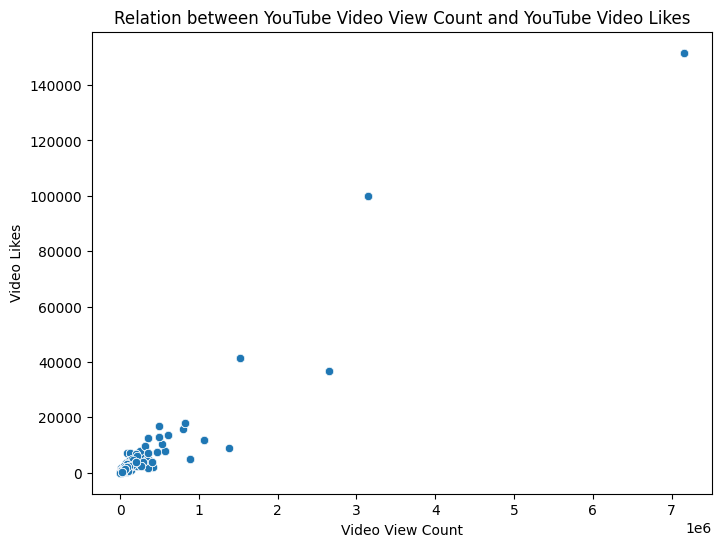

                  video_likes  video_view_count
video_likes          1.000000          0.962702
video_view_count     0.962702          1.000000


In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='video_view_count', y='video_likes')
plt.title('Relation between YouTube Video View Count and YouTube Video Likes')
plt.xlabel('Video View Count')
plt.ylabel('Video Likes')
plt.savefig('case1.png', dpi=300)
plt.show()
# Correlation Matrix
corr_matrix = videos_df[['video_likes', 'video_view_count']].corr()
print(corr_matrix)

### 2.3-Case 2: Relation between video_view_count and occurrence in watch_history

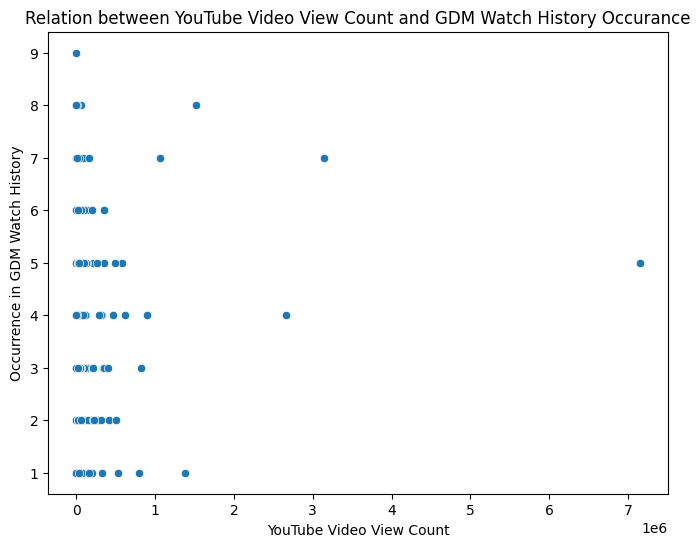

In [49]:
watch_history_count = merged_df['video_id'].value_counts().reset_index()
watch_history_count.columns = ['video_id', 'occurrence']

view_count_occurrence = pd.merge(videos_df[['id', 'video_view_count']], watch_history_count, left_on='id', right_on='video_id')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=view_count_occurrence, x='video_view_count', y='occurrence')
plt.title('Relation between YouTube Video View Count and GDM Watch History Occurance')
plt.xlabel('YouTube Video View Count')
plt.ylabel('Occurrence in GDM Watch History')
plt.savefig('case2.png', dpi=300)
plt.show()

### 2.4-Case 3: Aggregate number of likes and watch history per videos

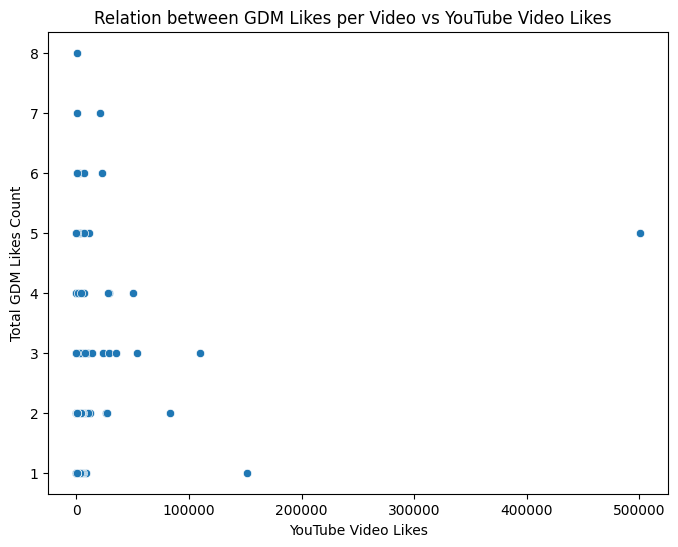

In [48]:
aggregated_likes_watch_history = merged_df[merged_df['is_liked'] == 1].groupby('video_id').agg({'video_likes': 'sum', 'is_liked': 'sum'}).reset_index()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=aggregated_likes_watch_history, x='video_likes', y='is_liked')
plt.title('Relation between GDM Likes per Video vs YouTube Video Likes  ')
plt.xlabel('YouTube Video Likes')
plt.ylabel('Total GDM Likes Count')
plt.savefig('case3.png', dpi=300)
plt.show()

### 2.5-Case 4: Aggregate number of watch history and total likes per video_owner

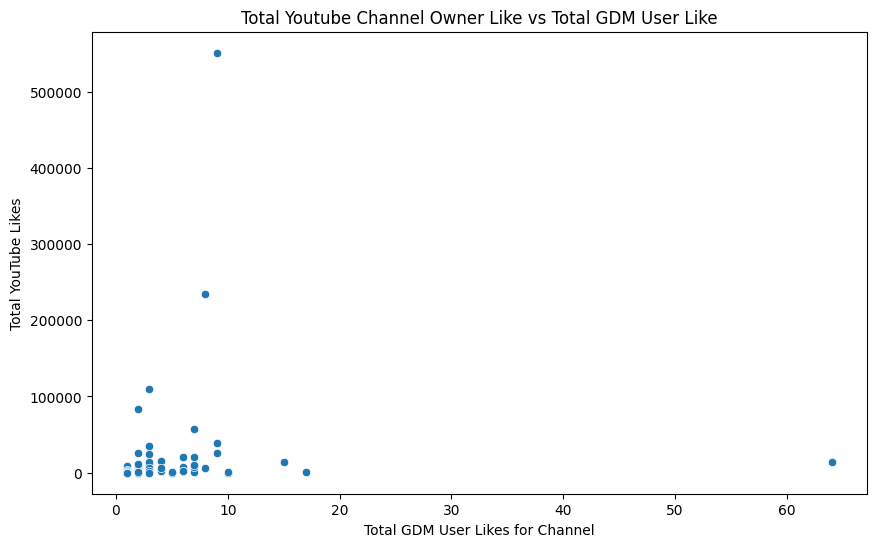

In [51]:
channel_likes_comparison = merged_df[merged_df['is_liked'] == 1].groupby('video_owner').agg({'is_liked': 'sum', 'video_likes': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=channel_likes_comparison, x='is_liked', y='video_likes')
plt.title('Total Youtube Channel Owner Like vs Total GDM User Like')
plt.xlabel('Total GDM User Likes for Channel')
plt.ylabel('Total YouTube Likes')
plt.savefig('case4.png', dpi=300)
plt.show()

### 2.5-Case 5: Relationship between video_Duration and likes in a histogram

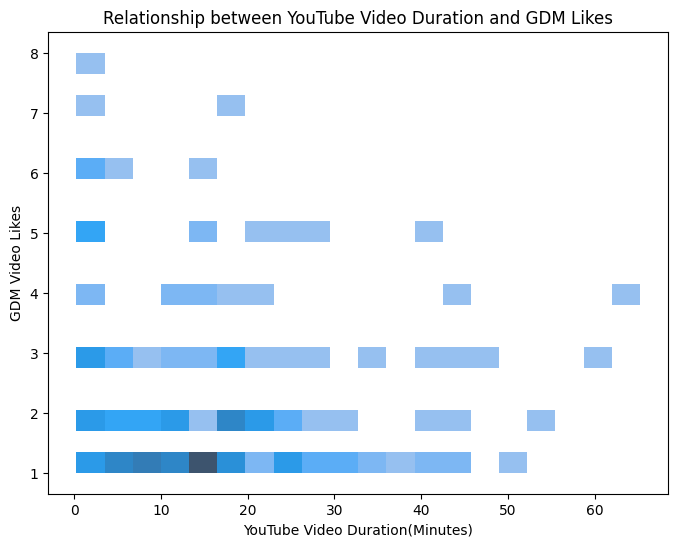

In [50]:
plt.figure(figsize=(8, 6)) 

aggregated_likes_watch_history = merged_df[merged_df['is_liked'] == 1].groupby('video_id').agg({'is_liked': 'sum'}).reset_index()
aggregated_likes_watch_history = pd.merge(aggregated_likes_watch_history, videos_df[['id', 'video_duration']], left_on='video_id', right_on='id')
aggregated_likes_watch_history['video_duration'] = aggregated_likes_watch_history['video_duration'] / 60

sns.histplot(data=aggregated_likes_watch_history, x='video_duration', y='is_liked', bins=20)
plt.title('Relationship between YouTube Video Duration and GDM Likes')
plt.xlabel('YouTube Video Duration(Minutes)')
plt.ylabel('GDM Video Likes')
plt.savefig('case5.png', dpi=300)
plt.show()